In [1]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Avoid the Runtime errors in true_divide encountered when trying to divide by zero
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

# matplotlib stuff:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['lines.linewidth'] = 2.0

In [2]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:33977 Dashboard: /proxy/8787/status,Cluster Workers: 4 Cores: 8 Memory: 34.36 GB


In [3]:
db = '/scratch/x77/db6174/access-om2/archive/databases/cc_database_nostress_cont_param_kpp.db'

In [4]:
session = cc.database.create_session(db)

In [5]:
expt = ['025deg_jra55_ryf_nostress_cont_kpp','025deg_jra55_ryf_nostress_cont_param_kpp']

In [6]:
vars_025deg = cc.querying.get_variables(session, experiment=expt[0])
vars_025deg[vars_025deg['name'].str.lower().str.match('area_t')]

,name,long_name,frequency,ncfile,# ncfiles,time_start,time_end
327,area_t,tracer cell area,static,output000/ocean/ocean-2d-area_t.nc,1,1900-01-01 00:00:00,1900-01-01 00:00:00


## Declaring areas of different regions

In [8]:
hblt_cont = cc.querying.getvar(expt = expt[0], session = session, variable = 'hblt', frequency = '1 daily', ncfile = 'ocean-2d-hblt-1-daily-snap-ym_1900_01.nc')
hblt_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'hblt', frequency = '1 daily', ncfile = 'ocean-2d-hblt-1-daily-snap-ym_1900_01.nc')

area_t = cc.querying.getvar(expt=expt[1], variable='area_t', session=session, frequency='static', n=1)

area_t_NA = area_t.sel(xt_ocean = slice(-90,10)).sel(yt_ocean = slice(10,65))
area_t_NA = (xr.ufuncs.isfinite(hblt_cont)*area_t_NA).mean('time')

area_t_NP = area_t.sel(xt_ocean = slice(-250,-100)).sel(yt_ocean = slice(10,65))
area_t_NP = (xr.ufuncs.isfinite(hblt_cont)*area_t_NP).mean('time')

area_t_SA = area_t.sel(xt_ocean = slice(-70,20)).sel(yt_ocean = slice(-65,-10))
area_t_SA = (xr.ufuncs.isfinite(hblt_cont)*area_t_SA).mean('time')

area_t_SP = area_t.sel(xt_ocean = slice(-250,-80)).sel(yt_ocean = slice(-65,-10))
area_t_SP = (xr.ufuncs.isfinite(hblt_cont)*area_t_SP).mean('time')

## KPP Mixing Layer

In [9]:
hblt_cont_NA = (hblt_cont*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pram_NA = (hblt_pram*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

hblt_cont_NP = (hblt_cont*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pram_NP = (hblt_pram*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

hblt_cont_SA = (hblt_cont*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pram_SA = (hblt_pram*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])

hblt_cont_SP = (hblt_cont*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pram_SP = (hblt_pram*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'KPP mixing layer - SP')

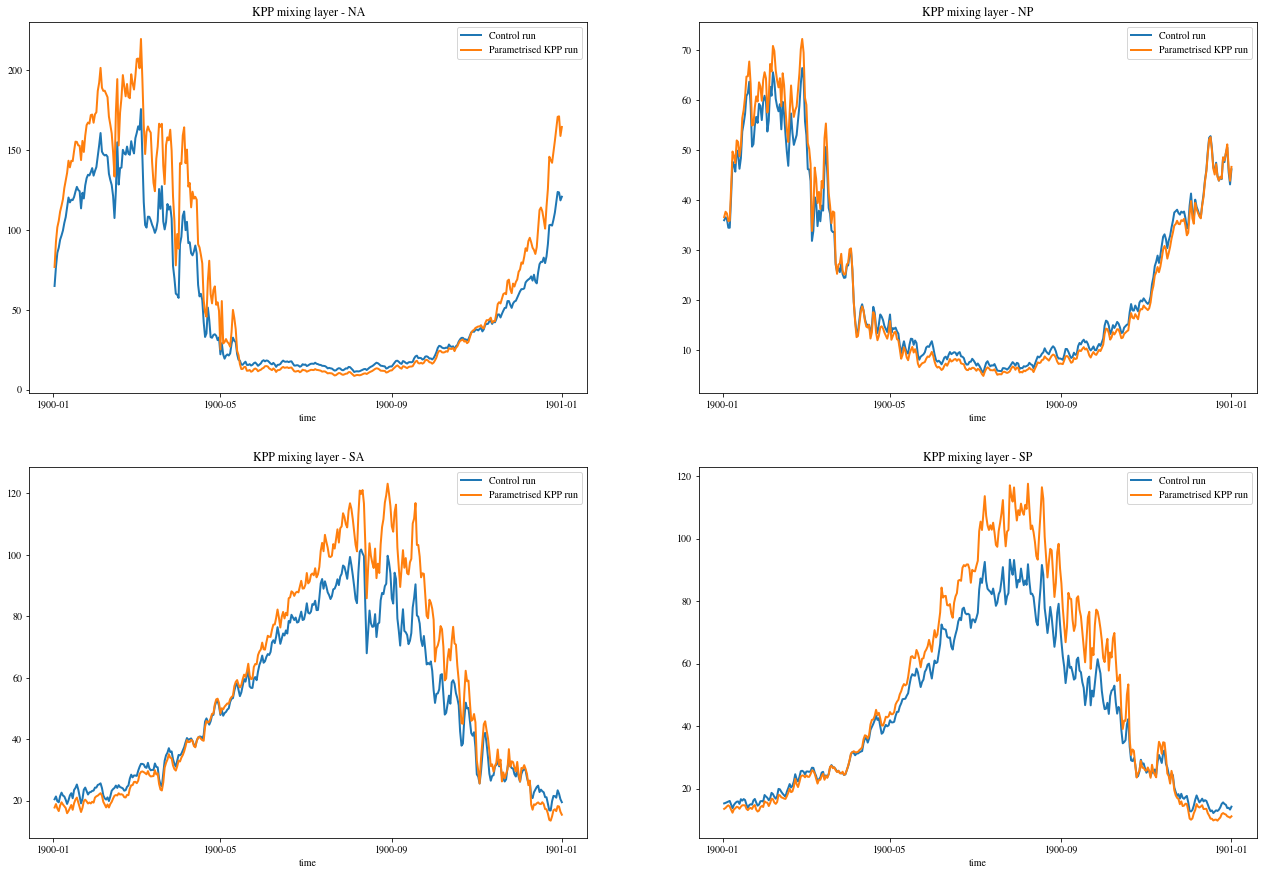

In [10]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (22,15))

hblt_cont_NA.plot(ax = axes[0][0],label = 'Control run')
hblt_pram_NA.plot(ax = axes[0][0],label = 'Parametrised KPP run')
axes[0][0].legend()
axes[0][0].set_title('KPP mixing layer - NA')

hblt_cont_NP.plot(ax = axes[0][1],label = 'Control run')
hblt_pram_NP.plot(ax = axes[0][1],label = 'Parametrised KPP run')
axes[0][1].legend()
axes[0][1].set_title('KPP mixing layer - NP')

hblt_cont_SA.plot(ax = axes[1][0],label = 'Control run')
hblt_pram_SA.plot(ax = axes[1][0],label = 'Parametrised KPP run')
axes[1][0].legend()
axes[1][0].set_title('KPP mixing layer - SA')

hblt_cont_SP.plot(ax = axes[1][1],label = 'Control run')
hblt_pram_SP.plot(ax = axes[1][1],label = 'Parametrised KPP run')
axes[1][1].legend()
axes[1][1].set_title('KPP mixing layer - SP')

## Surface temperature

In [11]:
temp_sfc_cont = cc.querying.getvar(expt = expt[0], session = session, variable = 'surface_temp', frequency = '1 daily')
temp_sfc_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'surface_temp', frequency = '1 daily')

In [12]:
temp_cont_NA = (temp_sfc_cont*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
temp_pram_NA = (temp_sfc_pram*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

temp_cont_NP = (temp_sfc_cont*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
temp_pram_NP = (temp_sfc_pram*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

temp_cont_SA = (temp_sfc_cont*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
temp_pram_SA = (temp_sfc_pram*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])

temp_cont_SP = (temp_sfc_cont*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
temp_pram_SP = (temp_sfc_pram*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'Surface temperature - SP')

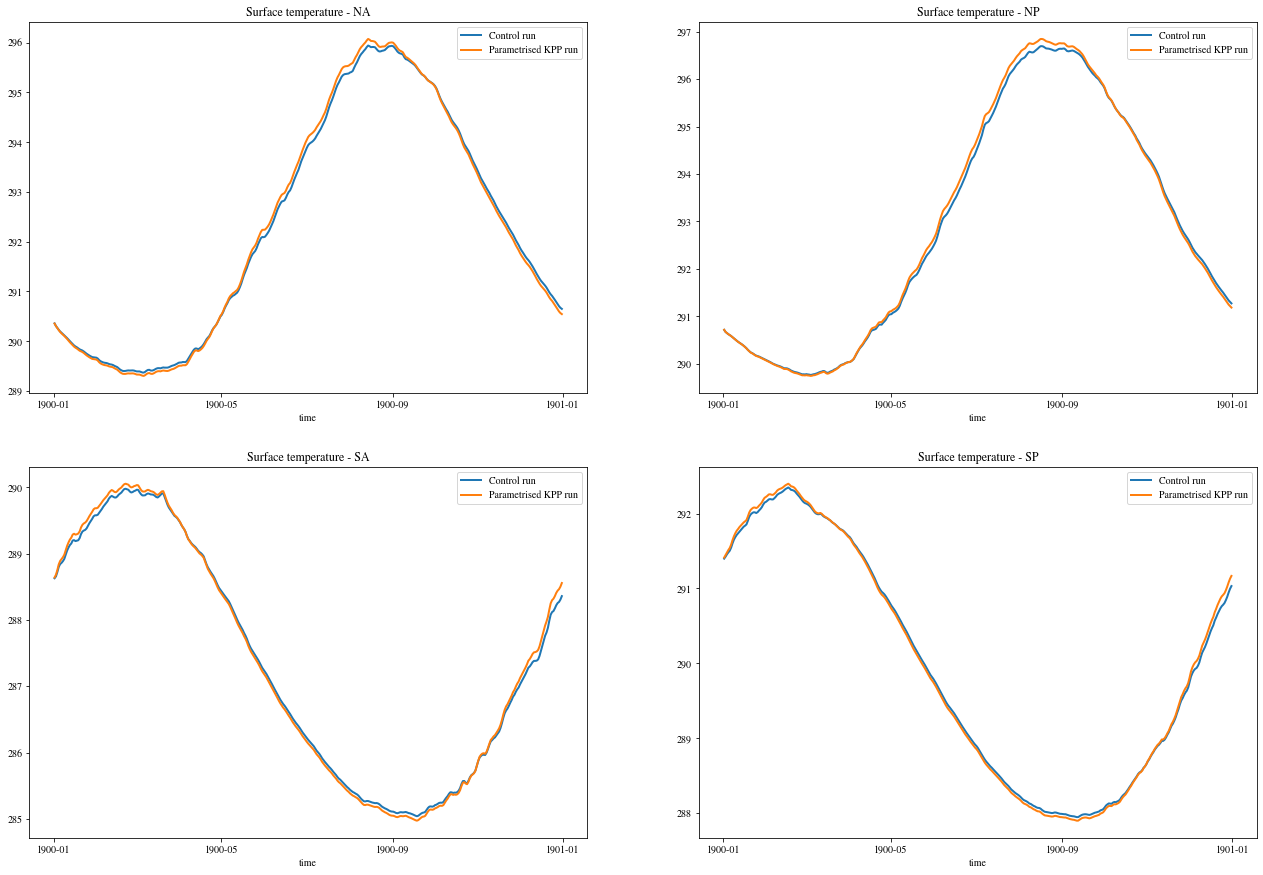

In [13]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (22,15))

temp_cont_NA.plot(ax = axes[0][0],label = 'Control run')
temp_pram_NA.plot(ax = axes[0][0],label = 'Parametrised KPP run')
axes[0][0].legend()
axes[0][0].set_title('Surface temperature - NA')

temp_cont_NP.plot(ax = axes[0][1],label = 'Control run')
temp_pram_NP.plot(ax = axes[0][1],label = 'Parametrised KPP run')
axes[0][1].legend()
axes[0][1].set_title('Surface temperature - NP')

temp_cont_SA.plot(ax = axes[1][0],label = 'Control run')
temp_pram_SA.plot(ax = axes[1][0],label = 'Parametrised KPP run')
axes[1][0].legend()
axes[1][0].set_title('Surface temperature - SA')

temp_cont_SP.plot(ax = axes[1][1],label = 'Control run')
temp_pram_SP.plot(ax = axes[1][1],label = 'Parametrised KPP run')
axes[1][1].legend()
axes[1][1].set_title('Surface temperature - SP')

## Surface salt

In [14]:
salt_sfc_cont = cc.querying.getvar(expt = expt[0], session = session, variable = 'surface_salt', frequency = '1 daily')
salt_sfc_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'surface_salt', frequency = '1 daily')

In [15]:
salt_cont_NA = (salt_sfc_cont*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
salt_pram_NA = (salt_sfc_pram*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

salt_cont_NP = (salt_sfc_cont*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
salt_pram_NP = (salt_sfc_pram*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

salt_cont_SA = (salt_sfc_cont*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
salt_pram_SA = (salt_sfc_pram*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])

salt_cont_SP = (salt_sfc_cont*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
salt_pram_SP = (salt_sfc_pram*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'Surface salinity - SP')

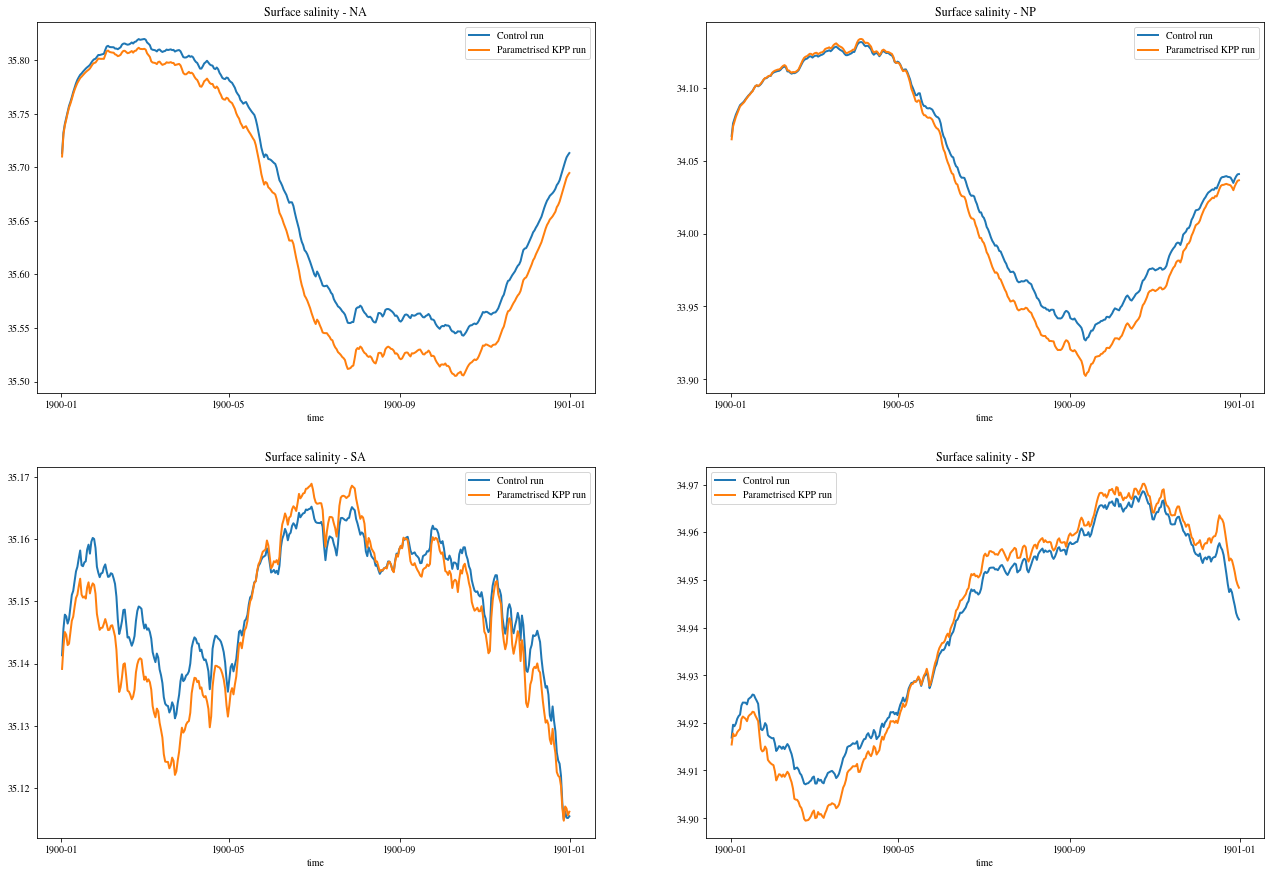

In [16]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (22,15))

salt_cont_NA.plot(ax = axes[0][0],label = 'Control run')
salt_pram_NA.plot(ax = axes[0][0],label = 'Parametrised KPP run')
axes[0][0].legend()
axes[0][0].set_title('Surface salinity - NA')

salt_cont_NP.plot(ax = axes[0][1],label = 'Control run')
salt_pram_NP.plot(ax = axes[0][1],label = 'Parametrised KPP run')
axes[0][1].legend()
axes[0][1].set_title('Surface salinity - NP')

salt_cont_SA.plot(ax = axes[1][0],label = 'Control run')
salt_pram_SA.plot(ax = axes[1][0],label = 'Parametrised KPP run')
axes[1][0].legend()
axes[1][0].set_title('Surface salinity - SA')

salt_cont_SP.plot(ax = axes[1][1],label = 'Control run')
salt_pram_SP.plot(ax = axes[1][1],label = 'Parametrised KPP run')
axes[1][1].legend()
axes[1][1].set_title('Surface salinity - SP')

## Freshwater fluxes

In [17]:
pme_river_cont = cc.querying.getvar(expt = expt[0], session = session, variable = 'pme_river', frequency = '1 monthly')
pme_river_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'pme_river', frequency = '1 monthly')

In [18]:
pme_cont_NA = (pme_river_cont*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
pme_pram_NA = (pme_river_pram*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

pme_cont_NP = (pme_river_cont*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
pme_pram_NP = (pme_river_pram*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

pme_cont_SA = (pme_river_cont*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
pme_pram_SA = (pme_river_pram*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])

pme_cont_SP = (pme_river_cont*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
pme_pram_SP = (pme_river_pram*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'Freshwater input - SP')

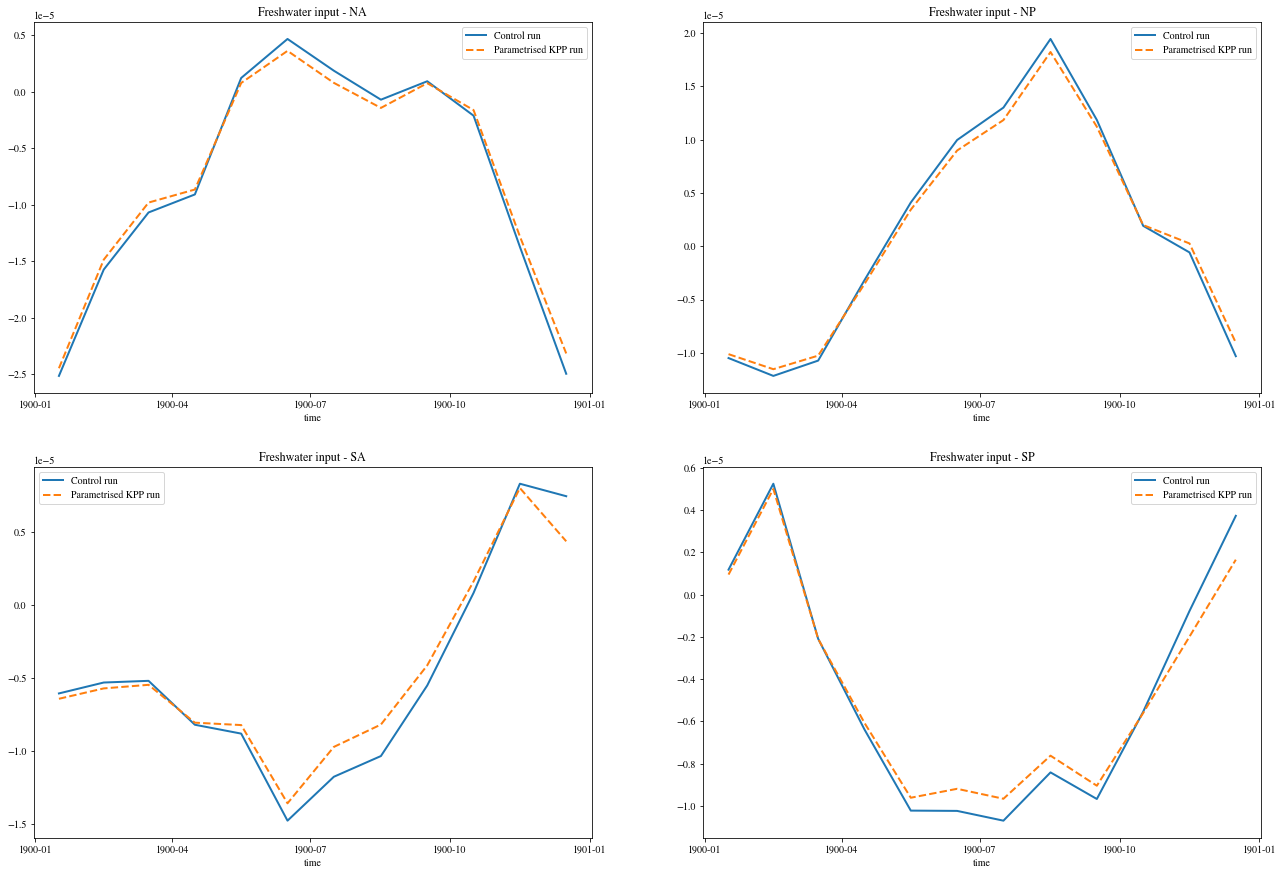

In [19]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (22,15))

pme_cont_NA.plot(ax = axes[0][0],label = 'Control run')
pme_pram_NA.plot(ax = axes[0][0],label = 'Parametrised KPP run',ls = '--')
axes[0][0].legend()
axes[0][0].set_title('Freshwater input - NA')

pme_cont_NP.plot(ax = axes[0][1],label = 'Control run')
pme_pram_NP.plot(ax = axes[0][1],label = 'Parametrised KPP run',ls = '--')
axes[0][1].legend()
axes[0][1].set_title('Freshwater input - NP')

pme_cont_SA.plot(ax = axes[1][0],label = 'Control run')
pme_pram_SA.plot(ax = axes[1][0],label = 'Parametrised KPP run',ls = '--')
axes[1][0].legend()
axes[1][0].set_title('Freshwater input - SA')

pme_cont_SP.plot(ax = axes[1][1],label = 'Control run')
pme_pram_SP.plot(ax = axes[1][1],label = 'Parametrised KPP run',ls = '--')
axes[1][1].legend()
axes[1][1].set_title('Freshwater input - SP')

## Surface heat fluxes

In [20]:
heat_sfc_cont = cc.querying.getvar(expt = expt[0], session = session, variable = 'net_sfc_heating', frequency = '1 monthly')
heat_sfc_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'net_sfc_heating', frequency = '1 monthly')

In [21]:
heat_cont_NA = (heat_sfc_cont*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
heat_pram_NA = (heat_sfc_pram*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

heat_cont_NP = (heat_sfc_cont*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
heat_pram_NP = (heat_sfc_pram*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

heat_cont_SA = (heat_sfc_cont*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
heat_pram_SA = (heat_sfc_pram*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])

heat_cont_SP = (heat_sfc_cont*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
heat_pram_SP = (heat_sfc_pram*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'Freshwater input - SP')

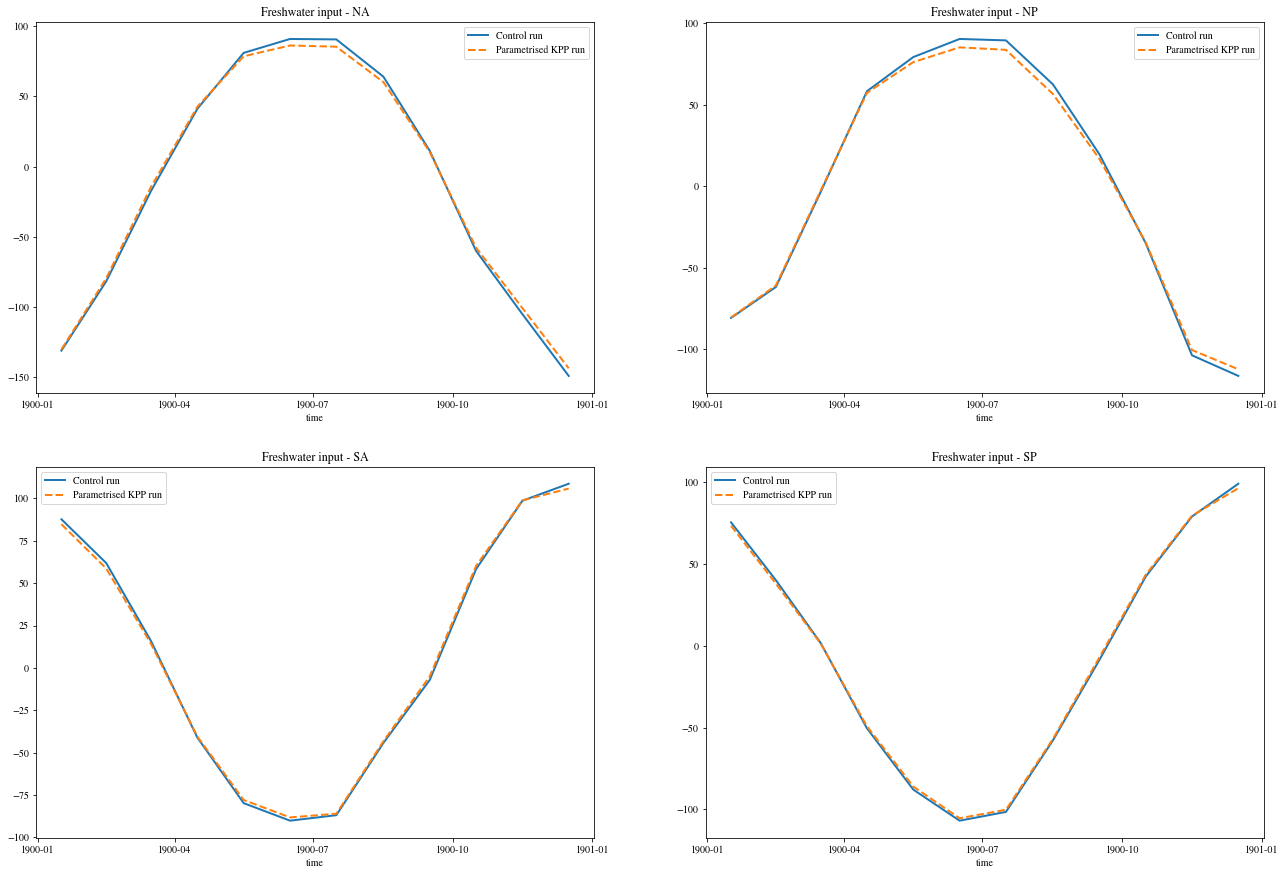

In [22]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (22,15))

heat_cont_NA.plot(ax = axes[0][0],label = 'Control run')
heat_pram_NA.plot(ax = axes[0][0],label = 'Parametrised KPP run',ls = '--')
axes[0][0].legend()
axes[0][0].set_title('Freshwater input - NA')

heat_cont_NP.plot(ax = axes[0][1],label = 'Control run')
heat_pram_NP.plot(ax = axes[0][1],label = 'Parametrised KPP run',ls = '--')
axes[0][1].legend()
axes[0][1].set_title('Freshwater input - NP')

heat_cont_SA.plot(ax = axes[1][0],label = 'Control run')
heat_pram_SA.plot(ax = axes[1][0],label = 'Parametrised KPP run',ls = '--')
axes[1][0].legend()
axes[1][0].set_title('Freshwater input - SA')

heat_cont_SP.plot(ax = axes[1][1],label = 'Control run')
heat_pram_SP.plot(ax = axes[1][1],label = 'Parametrised KPP run',ls = '--')
axes[1][1].legend()
axes[1][1].set_title('Freshwater input - SP')

## Gyre Strength

In [7]:
tx_trans_int_z_cont = cc.querying.getvar(expt[0], 'tx_trans_int_z', session)
ty_trans_int_z_cont = cc.querying.getvar(expt[0], 'ty_trans_int_z', session)
tx_trans_int_z_pram = cc.querying.getvar(expt[1], 'tx_trans_int_z', session)
ty_trans_int_z_pram = cc.querying.getvar(expt[1], 'ty_trans_int_z', session)

In [25]:
rho0 = 1025

x_min, x_max = -100, 10
y_min, y_max = 20, 65
ty_cont_NA = ty_trans_int_z_cont.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_cont_NA = ty_cont_NA.cumsum('xt_ocean').where(abs(ty_cont_NA<=1.e20))/(rho0*1.e6)
ty_pram_NA = ty_trans_int_z_pram.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_pram_NA = ty_pram_NA.cumsum('xt_ocean').where(abs(ty_pram_NA<=1.e20))/(rho0*1.e6)

x_min, x_max = -250, -100
y_min, y_max = 20, 65
ty_cont_NP = ty_trans_int_z_cont.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_cont_NP = ty_cont_NP.cumsum('xt_ocean').where(abs(ty_cont_NP<=1.e20))/(rho0*1.e6)
ty_pram_NP = ty_trans_int_z_pram.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_pram_NP = ty_pram_NP.cumsum('xt_ocean').where(abs(ty_pram_NP<=1.e20))/(rho0*1.e6)

x_min, x_max = -70, 20
y_min, y_max = -65, -20
ty_cont_SA = ty_trans_int_z_cont.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_cont_SA = ty_cont_SA.cumsum('xt_ocean').where(abs(ty_cont_SA<=1.e20))/(rho0*1.e6)
ty_pram_SA = ty_trans_int_z_pram.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_pram_SA = ty_pram_SA.cumsum('xt_ocean').where(abs(ty_pram_SA<=1.e20))/(rho0*1.e6)

x_min, x_max = -250, -80
y_min, y_max = -65, -20
ty_cont_SP = ty_trans_int_z_cont.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_cont_SP = ty_cont_SP.cumsum('xt_ocean').where(abs(ty_cont_SP<=1.e20))/(rho0*1.e6)
ty_pram_SP = ty_trans_int_z_pram.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_pram_SP = ty_pram_SP.cumsum('xt_ocean').where(abs(ty_pram_SP<=1.e20))/(rho0*1.e6)

Text(0.5, 1.0, 'Barotropic Streamfunction (SP) - Parametrised KPP Run')

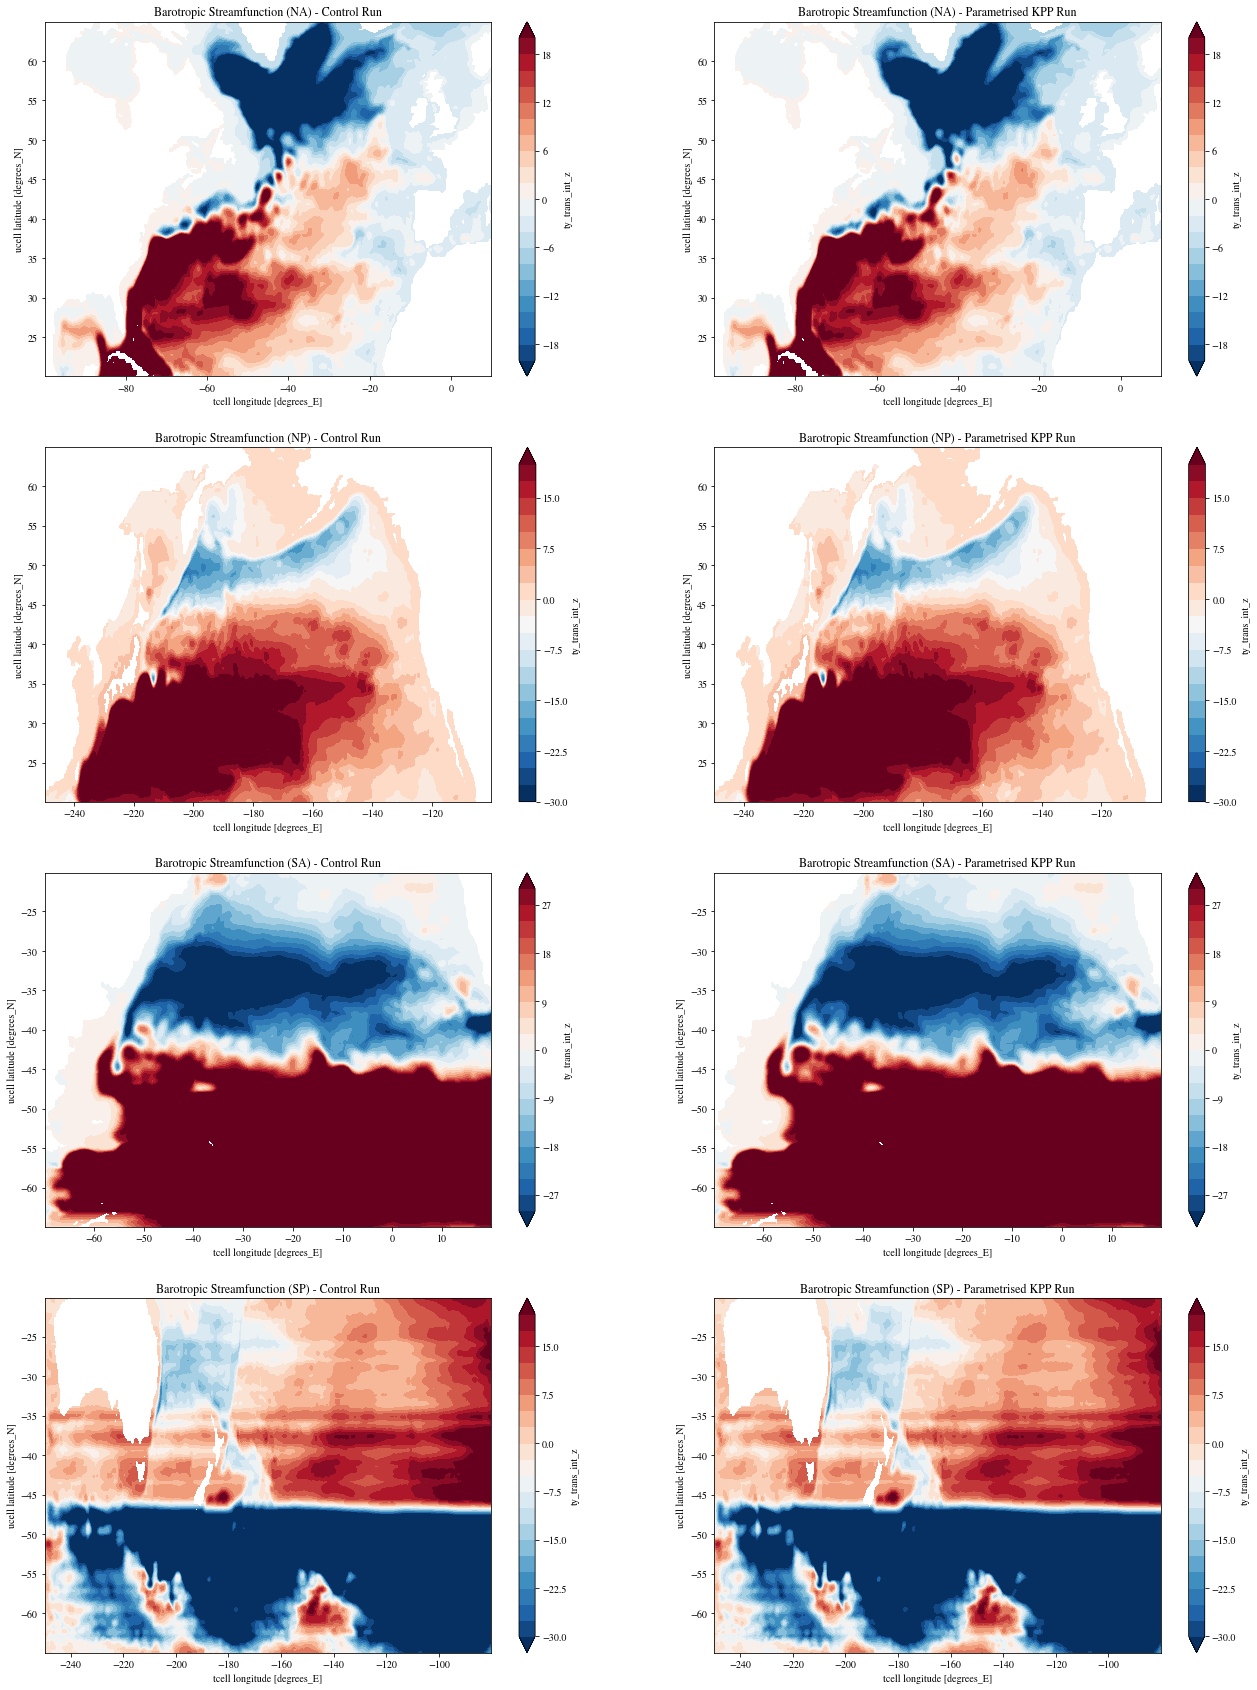

In [26]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (22,30))

psi_cont_NA.mean('time').plot.contourf(ax = axes[0][0], levels = np.linspace(-20,20,21))
axes[0][0].set_title('Barotropic Streamfunction (NA) - Control Run')

psi_pram_NA.mean('time').plot.contourf(ax = axes[0][1], levels = np.linspace(-20,20,21))
axes[0][1].set_title('Barotropic Streamfunction (NA) - Parametrised KPP Run')

psi_cont_NP.mean('time').plot.contourf(ax = axes[1][0], levels = np.linspace(-30,20,21))
axes[1][0].set_title('Barotropic Streamfunction (NP) - Control Run')

psi_pram_NP.mean('time').plot.contourf(ax = axes[1][1], levels = np.linspace(-30,20,21))
axes[1][1].set_title('Barotropic Streamfunction (NP) - Parametrised KPP Run')

psi_cont_SA.mean('time').plot.contourf(ax = axes[2][0], levels = np.linspace(-30,30,21))
axes[2][0].set_title('Barotropic Streamfunction (SA) - Control Run')

psi_pram_SA.mean('time').plot.contourf(ax = axes[2][1], levels = np.linspace(-30,30,21))
axes[2][1].set_title('Barotropic Streamfunction (SA) - Parametrised KPP Run')

psi_cont_SP.mean('time').plot.contourf(ax = axes[3][0], levels = np.linspace(-30,20,21))
axes[3][0].set_title('Barotropic Streamfunction (SP) - Control Run')

psi_pram_SP.mean('time').plot.contourf(ax = axes[3][1], levels = np.linspace(-30,20,21))
axes[3][1].set_title('Barotropic Streamfunction (SP) - Parametrised KPP Run')